<h1>INTRODUCTION</h1>

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

<h1>IMPORTING LIBRARIES</h1>

In [1]:
# Data manipulation and plotting modules
import numpy as np
import pandas as pd


# Data pre-processing
from sklearn.preprocessing import StandardScaler as ss

# Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling module
from xgboost.sklearn import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# Plotting Modules
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# Permutation feature importance
from sklearn.inspection import permutation_importance

# Misc
import time
import os
import gc
import random

# Used in Randomized parameter search
from scipy.stats import uniform

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set option to dislay many rows
pd.set_option('display.max_columns', 100)

<h1>DATA READING AND EXPLORATION</h1>

In [2]:
#Reading the file
data = pd.read_csv("aug_train.csv")

In [3]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# Exploring the data
print("\n Shape")
data.shape        


 Shape


(19158, 14)

In [5]:
print("\n\n Columns")
data.columns.values      
print("\n")          # Label column is of object type



 Columns


array(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'], dtype=object)

In [6]:
print("\n\nTarget distribution")
data.target.value_counts()



Target distribution


0.0    14381
1.0     4777
Name: target, dtype: int64

In [7]:
print("\n\nData types")                        
data.dtypes.value_counts()



Data types


object     10
float64     2
int64       2
dtype: int64

In [8]:
print("\n")
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
# Examine data statistics
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


<h1>DATA VISUALIZATION</h1>

In [10]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


<Figure size 864x432 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

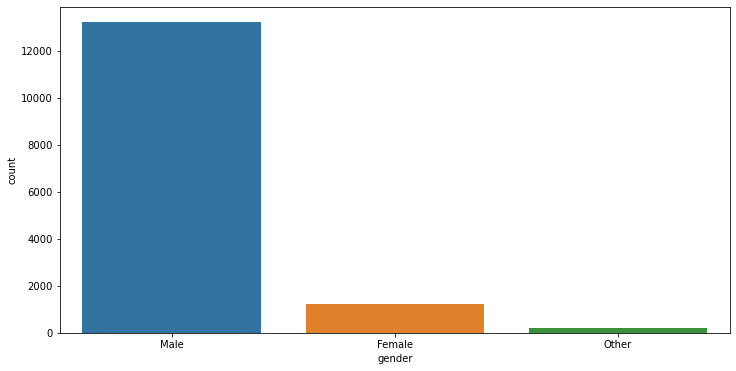

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data['gender'])
plt.show()                      # Displays the gender column in a countplot. Males are maximum in number, followed by females.

<Figure size 1152x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1d4c1382340>,
 [Text(-0.7009217057341881, 0.8477669269502535, 'Has relevent experience'),
  Text(0.700921705734188, -0.8477669269502536, 'No relevent experience')],
 [Text(-0.38232093040046616, 0.4624183237910473, '72.0%'),
  Text(0.3823209304004661, -0.46241832379104736, '28.0%')])

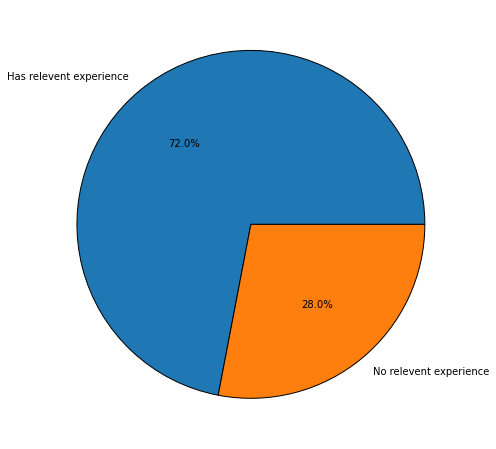

In [12]:
index=data['relevent_experience'].value_counts().index
values=data['relevent_experience'].value_counts()
plt.figure(figsize=(16,8))
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'})
plt.show()

# 72% of the people hold relevent experience while 28% don't have the relevent experience.

<Figure size 864x432 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 0, 'enrolled_university')

Text(0, 0.5, 'count')

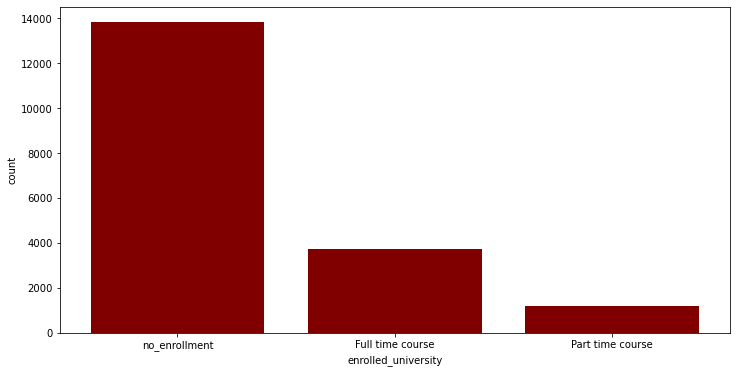

In [13]:
index=data['enrolled_university'].value_counts().index
values=data['enrolled_university'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(index, values, color ='maroon')
plt.xlabel("enrolled_university")
plt.ylabel("count")
plt.show()

<Figure size 1152x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1d4c1c87370>,
 [Text(-0.4058373664607044, 1.022397198736499, 'Graduate'),
  Text(-0.09045906830596125, -1.0962742161344567, 'Masters'),
  Text(0.919198372304279, -0.6042138299916382, 'High School'),
  Text(1.0835690829723417, -0.18941500053184424, 'Phd'),
  Text(1.0985274348514376, -0.056898812630149516, 'Primary School')],
 [Text(-0.22136583625129327, 0.5576711993108175, '62.0%'),
  Text(-0.04934130998506976, -0.5979677542551581, '23.3%'),
  Text(0.5013809303477885, -0.32957117999543895, '10.8%'),
  Text(0.5910376816212772, -0.10331727301736957, '2.2%'),
  Text(0.5991967826462385, -0.03103571598008155, '1.6%')])

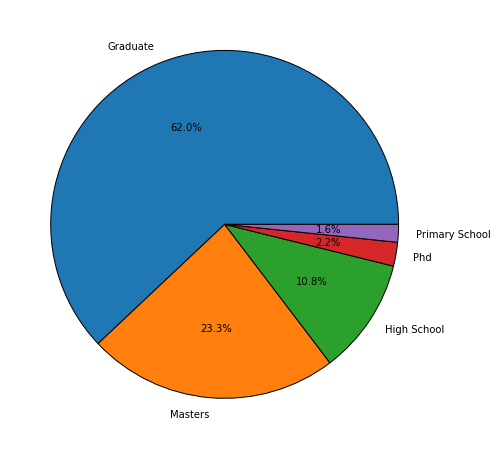

In [14]:
index=data['education_level'].value_counts().index
values=data['education_level'].value_counts()
plt.figure(figsize=(16,8))
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'})
plt.show()

# In terms of education, graduates are 62%, followed by masters at 23.3% and then high school.

<Figure size 864x432 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='major_discipline', ylabel='count'>

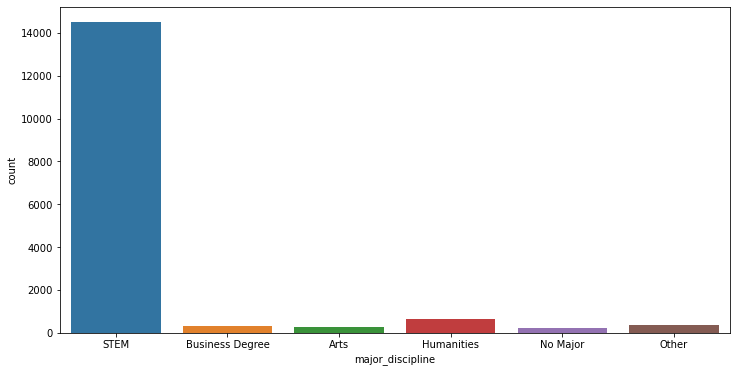

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data['major_discipline'])
plt.show()
print(data['major_discipline'].value_counts())

# Majority of the people have STEM as their major discipline. (14492)
# Humanities is far behind but is the second most major discipline with 669 people going for it.

<Figure size 1296x720 with 0 Axes>

Text(0.5, 0, 'company_size')

([<matplotlib.patches.Wedge at 0x1d4c1d5cf10>,
 [Text(0.817750779658451, 0.7357198259989979, '50-99'),
  Text(-0.5326299410371724, 0.9624475808638818, '100-500'),
  Text(-1.0996444155049456, -0.027967113701399513, '10000+'),
  Text(-0.722015614515376, -0.8298755644046788, '10/49'),
  Text(-0.0559162233231888, -1.098577887984858, '1000-4999'),
  Text(0.5987374969714339, -0.9227748423750955, '<10'),
  Text(0.9777226201664267, -0.504042139126182, '500-999'),
  Text(1.090169663143779, -0.1467314061848377, '5000-9999')],
 [Text(0.4460458798137005, 0.40130172327218067, '23.3%'),
  Text(-0.2905254223839122, 0.5249714077439355, '19.4%'),
  Text(-0.5998060448208793, -0.015254789291672458, '15.3%'),
  Text(-0.3938266988265687, -0.4526593987661883, '11.1%'),
  Text(-0.030499758176284798, -0.5992243025371953, '10.0%'),
  Text(0.3265840892571457, -0.5033317322045975, '9.9%'),
  Text(0.5333032473635054, -0.27493207588700835, '6.6%'),
  Text(0.5946379980784248, -0.08003531246445691, '4.3%')])

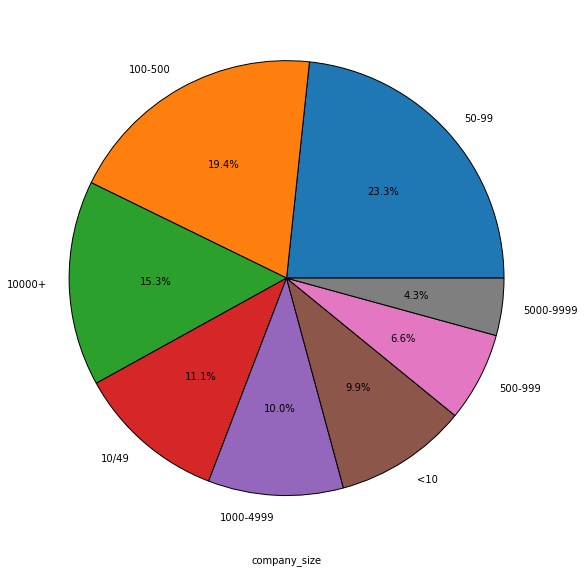

In [16]:
index=data['company_size'].value_counts().index
values=data['company_size'].value_counts()
plt.figure(figsize=(18,10))
plt.xlabel('company_size')
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={"edgecolor":"black"})
plt.show()

# Below pie chart shows that companies with lesser number of employees are more i.e 23.3% have only 50-99 employees

<Figure size 864x432 with 0 Axes>

<BarContainer object of 6 artists>

Text(0.5, 0, 'company_type')

Text(0, 0.5, 'count')

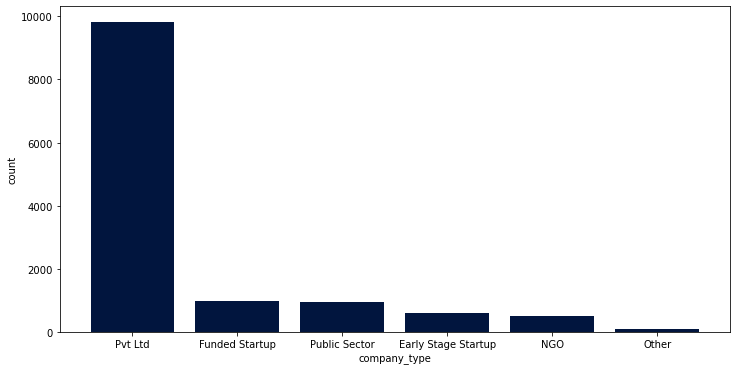

In [17]:
index=data['company_type'].value_counts().index
values=data['company_type'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(index, values, color ='#01153E')
plt.xlabel("company_type")
plt.ylabel("count")
plt.show()

# Pvt. Ltd firms are in majority

<Figure size 864x432 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='training_hours', ylabel='Density'>

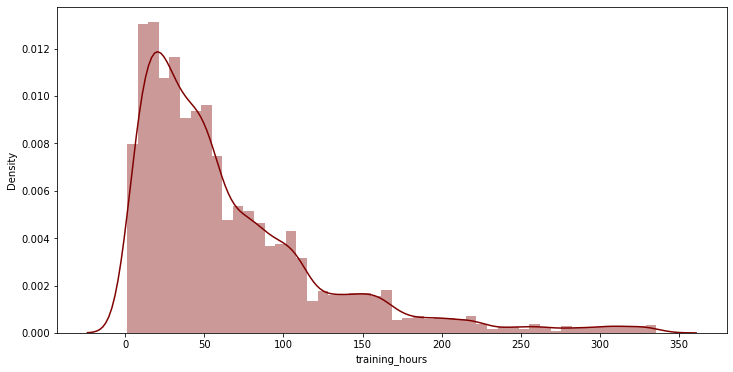

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(data['training_hours'],color='maroon')
plt.show()

<h1>COMPARING FEATURES WITH TARGET</h1>

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='count'>

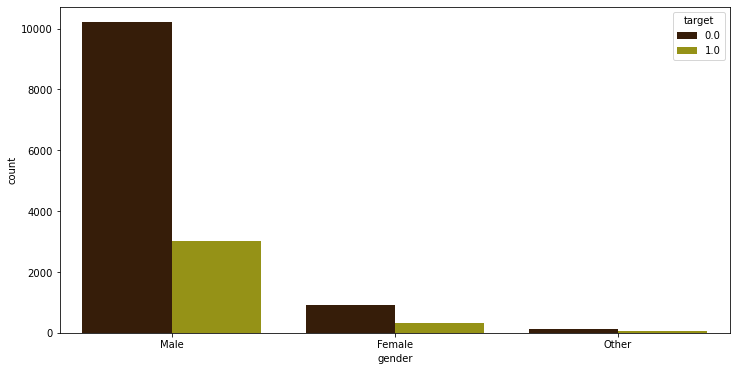

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x="gender",hue="target",data=data,palette=['#3D1C02',"#AAA602"])
plt.show()

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

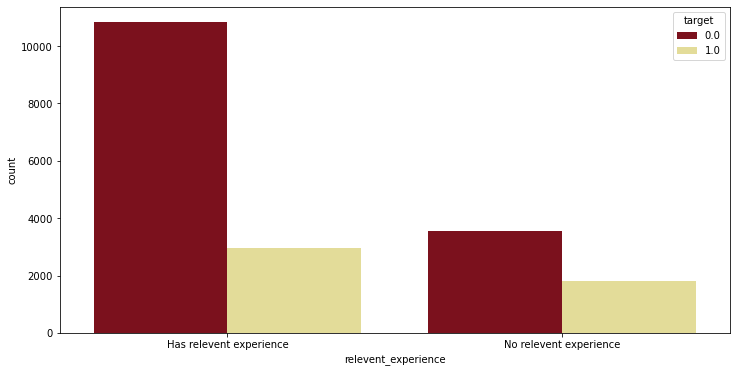

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x="relevent_experience",hue="target",data=data,palette=['#8C000F',"#F0E68C"])
plt.show()

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='experience', ylabel='count'>

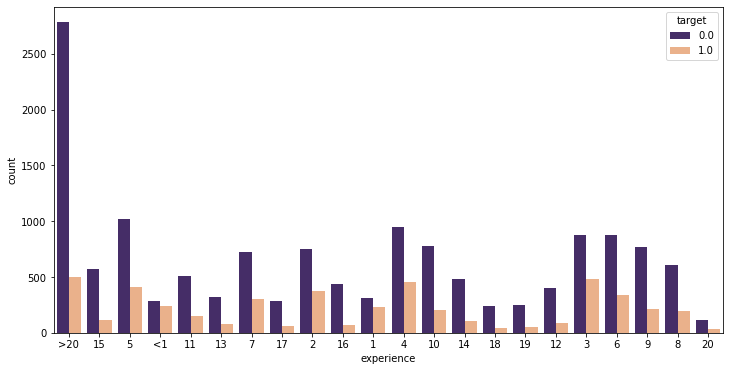

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x="experience",hue="target",data=data,palette=['#432371',"#FAAE7B"])
plt.show()

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='company_size', ylabel='count'>

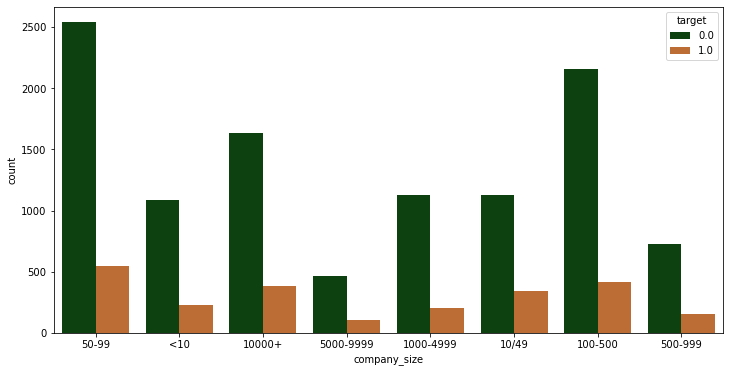

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x="company_size",hue="target",data=data,palette=['#054907',"#D2691E"])
plt.show()

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='company_type', ylabel='count'>

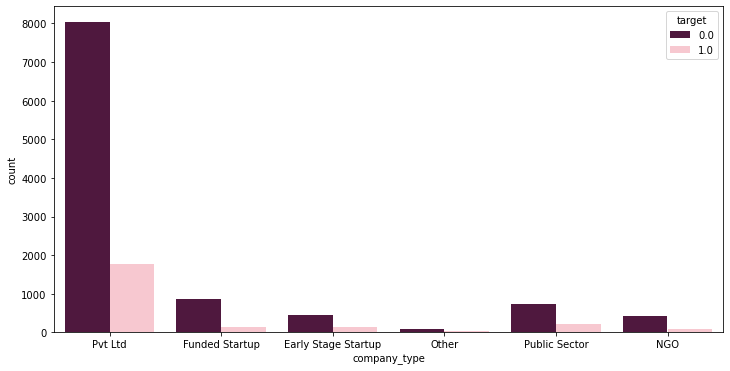

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x="company_type",hue="target",data=data,palette=['#580F41',"#FFC0CB"])
plt.show()

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

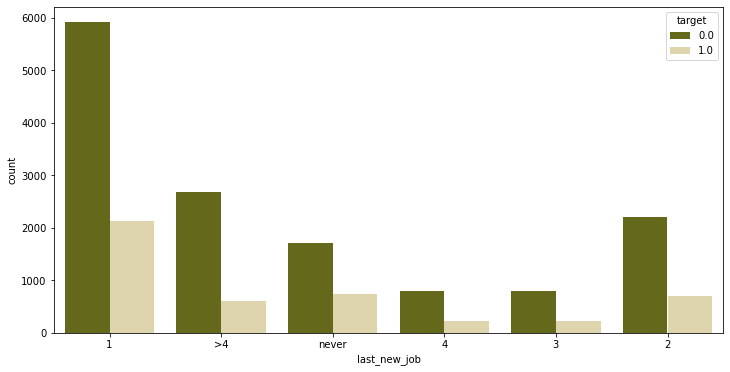

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x="last_new_job",hue="target",data=data,palette=['#6E750E',"#E6DAA6"])
plt.show()

<h1>IDENTIFYING STRUCTURE IN DATA</h1>

In [25]:
data_st = data.sample(n=5000)

In [26]:
data_st.drop(columns = ['enrollee_id', 'city'],inplace = True  )

In [27]:
data_st.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1172,0.887,Female,No relevent experience,no_enrollment,Masters,STEM,5,50-99,Pvt Ltd,1,218,0.0
6781,0.794,NaN,No relevent experience,Part time course,Graduate,STEM,1,50-99,Pvt Ltd,1,9,0.0
34,0.910,Male,Has relevent experience,no_enrollment,Graduate,Business Degree,12,5000-9999,Pvt Ltd,3,145,0.0
1340,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Funded Startup,never,111,0.0
12412,0.740,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,1000-4999,Pvt Ltd,>4,49,0.0


In [28]:
# Select only numeric columns for the purpose
num_data = data_st.select_dtypes(include = ['float64', 'int64']).copy()
num_data.head()
num_data.shape      
num_data.columns

,city_development_index,training_hours,target
1172,0.887,218,0.0
6781,0.794,9,0.0
34,0.910,145,0.0
1340,0.624,111,0.0
12412,0.740,49,0.0


(5000, 3)

Index(['city_development_index', 'training_hours', 'target'], dtype='object')

In [29]:
data_st.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [30]:
# Columns in num_data that are either discrete (with few levels) or numeric

cols=['city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target' ]
num_cols=['city_development_index', 'training_hours', 'target'] 
cat_cols=['gender', 'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']

In [31]:
# Create an instance of StandardScaler object
ss=ss()

In [32]:
# Use fit and transform method
nc = ss.fit_transform(num_data.loc[:,num_cols])

In [33]:
nc.shape     

(5000, 3)

In [34]:
# Transform numpy array back to pandas dataframe as we will be using pandas plotting functions

nc = pd.DataFrame(nc, columns = num_cols)
nc.head(2)

,city_development_index,training_hours,target
0,0.446966,2.607551,-0.563184
1,-0.322048,-0.947937,-0.563184


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_cols:
    nc[i] = le.fit_transform(data_st[i])

In [36]:
data_st.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1172,0.887,Female,No relevent experience,no_enrollment,Masters,STEM,5,50-99,Pvt Ltd,1,218,0.0
6781,0.794,NaN,No relevent experience,Part time course,Graduate,STEM,1,50-99,Pvt Ltd,1,9,0.0
34,0.910,Male,Has relevent experience,no_enrollment,Graduate,Business Degree,12,5000-9999,Pvt Ltd,3,145,0.0
1340,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Funded Startup,never,111,0.0
12412,0.740,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,1000-4999,Pvt Ltd,>4,49,0.0


In [37]:
nc.shape

(5000, 12)

In [38]:
# Also create a dataframe from random data for comparison:

rng = np.random.default_rng()
nc_rand = pd.DataFrame(rng.normal(size = (5000,12)),
                       columns = cols    # Assign column names, just like that
                       )

In [39]:
# Add/overwrite these columns also

nc_rand['gender'] = np.random.randint(3,   size= (5000,))   # [0,1]
nc_rand['relevent_experience'] = np.random.randint(2, size= (5000,))   # [1,2,3]
nc_rand['enrolled_university'] = np.random.randint(3,  size= (5000,))   # [0 to 23]
nc_rand['education_level'] = np.random.randint(5,   size= (5000,))   # [0 to 6]
nc_rand['major_discipline'] = np.random.randint(6,   size= (5000,))   # [0,1]
nc_rand['experience'] = np.random.randint(22,   size= (5000,))   # [0,1]
nc_rand['company_size'] = np.random.randint(8, size= (5000,))   # [1,2,3]
nc_rand['company_type'] = np.random.randint(6,  size= (5000,))   # [0 to 23]
nc_rand['last_new_job'] = np.random.randint(6,   size= (5000,))   # [0 to 6]

nc_rand.shape

(5000, 12)

In [40]:
# Radviz Plot

<AxesSubplot:>

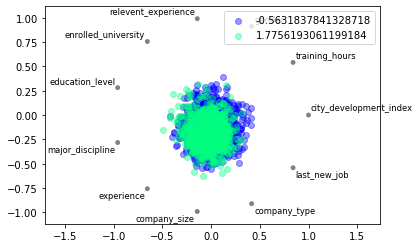

In [41]:
# 7.0 Radviz plot
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.radviz.html

fig5 = plt.figure()
pd.plotting.radviz(nc,
                   class_column ='target',
                   colormap= plt.cm.winter,
                   alpha = 0.4
                   )

In [42]:
# t-sne

In [43]:
# See the power of t-sne (t-distributed Stochastic Neighbor Embedding)

from sklearn.manifold import TSNE

(5000, 2)

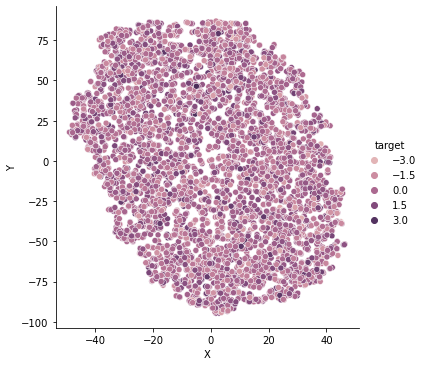

In [44]:
X_embedded = TSNE(n_components=2).fit_transform(nc_rand.iloc[:,:-1])
X_embedded.shape   
df = pd.DataFrame(X_embedded, columns=['X','Y'])

# 11.5.2 No two plots will be the same
sns.relplot(x = "X",
            y = "Y",
            hue = nc_rand.target,    
            data = df
            )

(5000, 2)

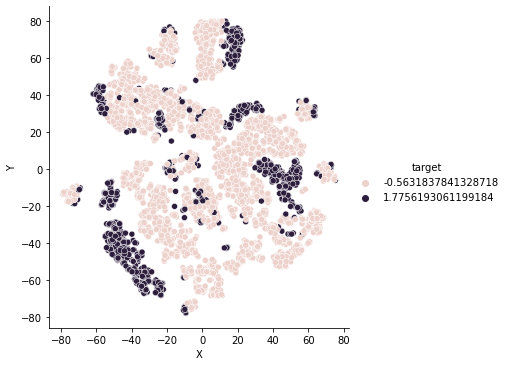

In [45]:
# Project all data but 'target' on two axis

X_embedded = TSNE(n_components=2).fit_transform(nc.iloc[:,:-1])
X_embedded.shape    # (1000,2), numpy array
df = pd.DataFrame(X_embedded, columns=['X','Y'])

# 1No two plots will be the same
sns.relplot(x = "X",
            y = "Y",
            hue = nc.target,   
            data = df
            )

<h1>FEATURE PREPARATION</h1>

In [46]:
# We do not enrollee_Id column and city column
data.drop(columns = ['enrollee_id', 'city'],inplace = True  )

In [47]:
# Divide data into predictors and target
# First 11 columns are predictors

X = data.iloc[ :, 0:11]
X.head()

# 12th column is target
print("\n\nTarget,y, values")
y = data.iloc[ : , 11]
y.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8




Target,y, values


0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: target, dtype: float64

In [48]:
data.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [49]:
# Dividing the columns into categorical and numerical columns

num_cols = ['city_development_index']
cat_cols = ['gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours']

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[cat_cols] = X[cat_cols].apply(le.fit_transform)

In [51]:
X.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.920,1,0,2,0,5,21,8,6,0,35
1,0.776,1,1,2,0,5,6,4,5,4,46
2,0.624,3,1,0,0,5,15,8,6,5,82
3,0.789,3,1,3,0,1,20,8,5,5,51
4,0.767,1,0,2,2,5,21,4,1,3,7


In [52]:
# Changing the datatype to float32 

X.min().min()        
X.max().max()         

# Save memory
X = X.astype('float32')


0.0

240.0

In [53]:
# Store column names somewhere for use in feature importance

colnames = X.columns.tolist()

In [54]:
# Split dataset into train and validation parts

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    shuffle = True,
                                                    stratify = y
                                                    )


X_train.shape       
X_test.shape        
y_train.shape       
y_test.shape         

(12452, 11)

(6706, 11)

(12452,)

(6706,)

<h1>CREATING PIPELINE</h1>

In [56]:
# Pipe using XGBoost

steps_xg = [('sts', ss ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)      
            )
            ]

# Instantiate Pipeline object

pipe_xg = Pipeline(steps_xg)

<h1>GRID SEARCH</h1>

In [57]:
# Parameters in the pipe that are available for tuning

print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()




--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, gamma=None,
                 gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                 max_leaves=None, min_child_weight=None, missing=nan,
                 monotone_constraints=None, n_estimators=100, n_jobs=3,
                 num_parallel_tree=None, predictor=None, random_state=None,
                 reg_alpha=None, reg_lambda=None, ...))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(base_score=None, booster=None, callbacks=None,
               c

In [58]:
# Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [25,30],
              'xg__booster': ['gbtree','gblinear']
              }                               # Total: 2 * 2 * 2 * 2



In [59]:
# Define revised dictionary

parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [2,11],
               }                               # Total: 2 * 2 * 2 * 2



In [60]:
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )



In [61]:
# Delete objects not needed
# We need X_train, y_train, X_test, y_test
del X
del data
del y
gc.collect()

140

In [62]:
# Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60               



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[01:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_p

0.09222317934036255

In [63]:
# Best Score
f"Best score: {clf.best_score_} "            # 'Best score: 0.7721319235599563 '

# Best parameters
print()
f"Best parameter set {clf.best_params_}"

'Best score: 0.7691486020290981 '

"Best parameter set {'pca__n_components': 11, 'xg__learning_rate': 0.05, 'xg__max_depth': 4}"

--Few predictions--



array([0, 0, 0, 0])



--Accuracy Score--



77.54249925439905



--Confusion Matrix--



array([[4707,  327],
       [1179,  493]], dtype=int64)



--F1 Score pos-label: 1--



0.3956661316211878



--F1 Score pos-label: 0--



0.8620879120879121



--ROC curve--



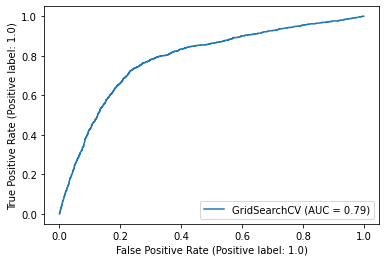

In [64]:
# Make predictions using the best returned model
y_pred = clf.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0            

# Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

# F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1)      

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred, pos_label = 0)     

# ROC curve and get AUC
print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, X_test, y_test)

In [65]:
# Get feature importances from GridSearchCV best fitted 'xg' model

print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



(11,)



---Feature importances---



array([0.2162006 , 0.19524767, 0.09647755, 0.05479018, 0.02968237,
       0.05033278, 0.10659251, 0.03729194, 0.1074792 , 0.06242492,
       0.04348035], dtype=float32)

In [66]:
# Create a dataframe of feature importances with names of columns and sorted by feature-imp

imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

df_imp

,imp
education_level,0.029682
company_size,0.037292
training_hours,0.043480
major_discipline,0.050333
enrolled_university,0.054790
last_new_job,0.062425
relevent_experience,0.096478
experience,0.106593
company_type,0.107479
gender,0.195248


In [67]:
# First five columns with least feature importance are:

list(df_imp.index.values[:5])

['education_level',
 'company_size',
 'training_hours',
 'major_discipline',
 'enrolled_university']

In [68]:
# Let us drop these from X_train and X_test
Xtrain = X_train.drop(columns = list(df_imp.index.values[:5]))
Xtest = X_test.drop(columns = list(df_imp.index.values[:5]))

# Build model again with reduced dataset
clf_dr = GridSearchCV(pipe_xg,            # pipeline object
                      parameters,         # possible parameters
                      n_jobs = 2,         # USe parallel cpu threads
                      cv =3 ,             # No of folds
                      verbose =2,         # Higher the value, more the verbosity
                      scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                      refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                     )


start = time.time()
clf_dr.fit(Xtrain, y_train)
end = time.time()
(end - start)/60               

# Make predictions
y_pred_dr = clf_dr.predict(Xtest)

# Compare results.
f1_score(y_test,y_pred_dr, pos_label = 1)      
f1_score(y_test,y_pred_dr, pos_label = 0)      
f1_score(y_test,y_pred, pos_label = 1)      
f1_score(y_test,y_pred, pos_label = 0)      

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.75666571 0.75401571 0.75690656 0.7553005         nan        nan
        nan        nan]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.7146458  0.72058536 0.71609131 0.72088451        nan        nan
        nan        nan]
  warnings.warn(


[01:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_p

0.03222217559814453

0.25885558583106266

0.8544157002676182

0.3956661316211878

0.8620879120879121

<h1>RANDOMIZED SEARCH</h1>

In [69]:
# Tune parameters using randomized search
# Hyperparameters to tune and their ranges
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(2,11)}

In [70]:
# Tune parameters using random search
# Create the object first

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,           
                                              
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,          
                          cv = 2               
                        )


In [71]:
# Run random search for 25 iterations

start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60  

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[01:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('sts', StandardScaler()),
                                             ('pca', PCA()),
                                             ('xg',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            g

0.04350915352503459

In [72]:
# Evaluate
f"Best score: {rs.best_score_} " ;print()           
f"Best parameter set: {rs.best_params_} " ; print()


# Make predictions from the best returned model
y_pred = rs.predict(X_test)


# Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()     
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1)}" ; print()     


'Best score: 0.7152198014273548 '

"Best parameter set: {'pca__n_components': 3, 'xg__learning_rate': 0.2361314733427654, 'xg__max_depth': 4, 'xg__n_estimators': 180} "

'Accuracy: 75.39516850581569'

'f1 score: 0.29245283018867924'